### Group-1 Predicting RTC Severity 

**Days of week** column is encoded as     
Wednesday 1 --   Thurday   2  --    Friday    3  --   Saturday  4  --   Sunday    5 ----  Monday    6 ---    Tuesday   7
**InScotland** column is encoded as 
1  Yes  if accident took place   
2  No  if accident did not took place in Scotland

**Urban_or_Rural_Area** Accidents took place in Urban or rural area. Here Urban is indicated by  1 and Rural area is indicated by 2.

**Road_Type** There are diffrent types of roads in Liverpool  where accidents took place 
Dual carriageway  --->    represented  by  1     -----        Single carriageway  -->  represented  by  2
One way street  -->      represented  by  3     -----        Roundabout   --->         represented  by  4
Slip road    -->         represented  by  5

**Weather_Conditions** --
Fine no high winds    = 1 ,  Raining no high winds = 2 , Other = 3 , Snowing no high winds = 4 , Fine + high winds = 5 ,
Raining + high winds = 6 , Fog or mist =7 , Snowing + high winds = 9 ,

**Road_Surface_Conditions**
 Dry  =1 --  Wet or damp = 2 ---  Frost or ice = 3  ----  Snow = 4 --- Flood over 3cm. deep = 5     
**1st_Road_Class**  
 B = 1     ,   C = 2   ,    A = 4     ,     Motorway = 5      ,   A(M) = 6    
**Light_Conditions** There are 5 light conditions
Darkness - lights lit     is  represented by 1   ,    
Darkness - lighting unknown   represented b 2    ,
Darkness - lights unlit    represented by 3      , 
Darkness - no lighting     represented by 4      ,
Daylight       represented by              5  

**Junction_Control**
Auto trafic Signal =1 ,   Give way or uncontrolled = 3   ,   Data missing or out of range = 4   , here 7 and 4 are combined 
somehow  ,   Data missing or out of range = 7

some columns of junction controll are also combined .


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set()
%matplotlib inline

In [2]:
#!pip install pyarrow
#!pip install fastparquet

In [3]:

data=pd.read_csv('accident_data.csv')
df=data.copy()

In [4]:
df.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,04/01/2005,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,05/01/2005,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,06/01/2005,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,07/01/2005,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,NaN,0.0,NaN,0.0,Slight,None,10/01/2005,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30,21:13,Urban,Fine no high winds,2005,No


In [5]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
1st_Road_Number,1048573.000000,1011.997007,1832.041637,0.000000,0.000000,125.000000,706.000000,9999.000000
2nd_Road_Number,1037772.000000,387.000433,1316.672921,0.000000,0.000000,0.000000,0.000000,9999.000000
Did_Police_Officer_Attend_Scene_of_Accident,1048306.000000,1.198669,0.406263,1.000000,1.000000,1.000000,1.000000,3.000000
Latitude,1048464.000000,52.572970,1.424463,49.914430,51.492443,52.343142,53.464070,60.757544
Location_Easting_OSGR,1048464.000000,438307.694984,94792.918660,64950.000000,375220.000000,437700.000000,521160.000000,655540.000000
Location_Northing_OSGR,1048464.000000,298312.981282,158175.671919,10520.000000,178470.000000,272930.000000,396550.000000,1208800.000000
Longitude,1048463.000000,-1.454537,1.391890,-7.516225,-2.371331,-1.435624,-0.244605,1.762010
Number_of_Casualties,1048575.000000,1.359930,0.822365,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,1048575.000000,1.835030,0.718145,1.000000,1.000000,2.000000,2.000000,32.000000
Pedestrian_Crossing-Human_Control,1048554.000000,0.009292,0.126723,0.000000,0.000000,0.000000,0.000000,2.000000


In [6]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

In [7]:
df.shape

(1048575, 34)

<AxesSubplot:>

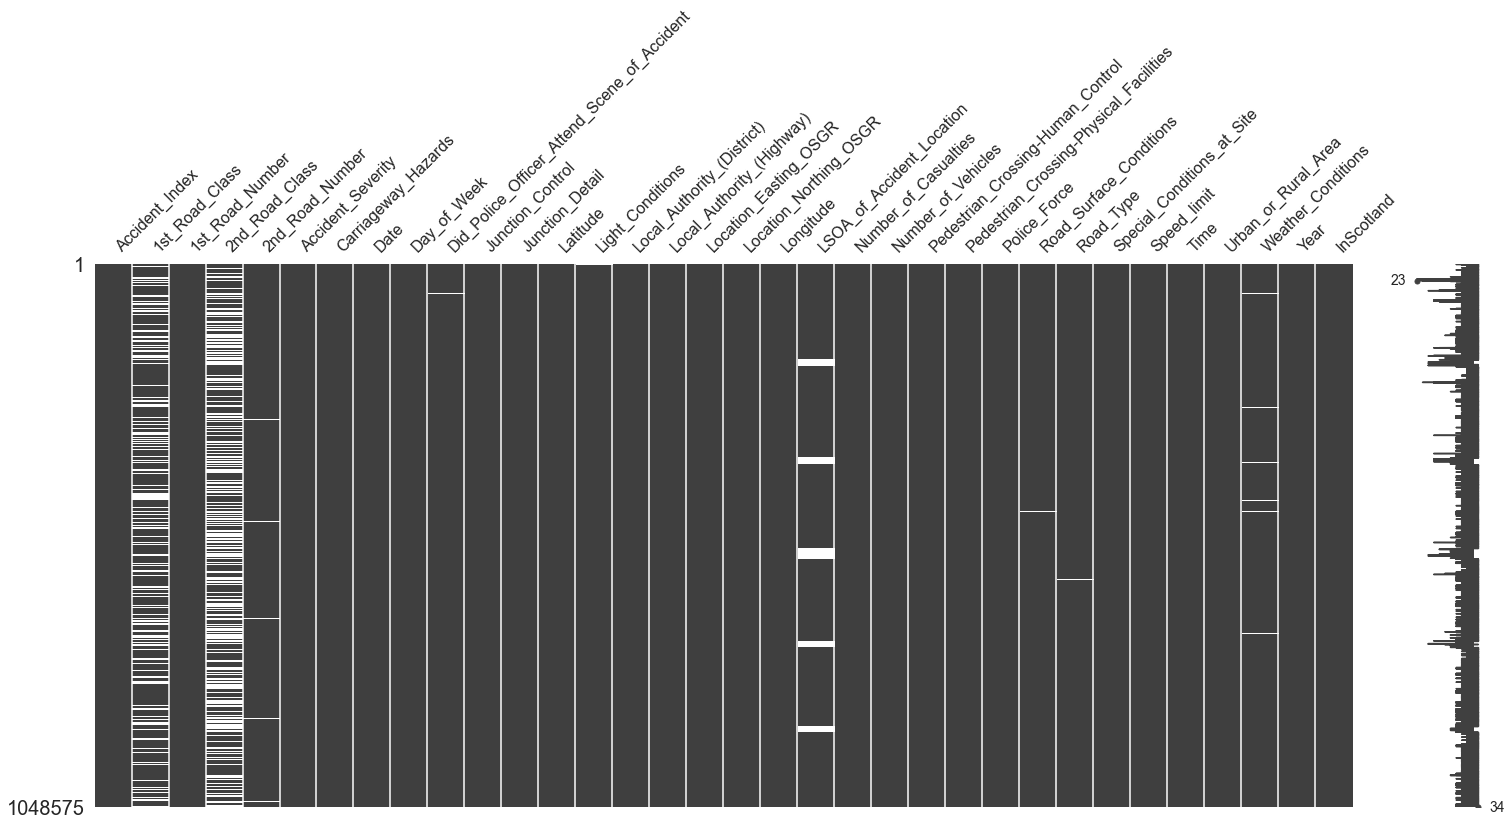

In [8]:
#msno.bar(df,figsize=(15,6) , fontsize=14);
msno.matrix(df)

**Observations** Since Data is clean there are no missing values in the data

In [9]:
df.isnull().sum()

Accident_Index                                      0
1st_Road_Class                                 305589
1st_Road_Number                                     2
2nd_Road_Class                                 439824
2nd_Road_Number                                 10803
Accident_Severity                                   0
Carriageway_Hazards                                29
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       269
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          111
Light_Conditions                                 2084
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             111
Location_Northing_OSGR                            111
Longitude                   

In [10]:
def missing_value(value):
    
    if str(value) == 'Unclassified' or str(value)=='None' or str(value)=='Data missing or out of range' or str(value)=='Unallocated' or  str(value)=='Not known' or str(value)=='Unknown' :
            
             return np.nan
    else:
             return value

for col in df.columns:
     
    df[col] = df[col].apply(lambda  x : missing_value (x))
    

In [11]:
# checking Missing unspelled , erroneous Data for Accident data 

for column in df.columns:
    print(column + ' : ' + str(len(df[column].unique())))
    if(len(df[column].unique()) < 100):
        print(column + ' : ' + str(df[column].unique()))
    print('\n')

Accident_Index : 671340


1st_Road_Class : 6
1st_Road_Class : ['A' 'B' 'C' nan 'Motorway' 'A(M)']


1st_Road_Number : 6553


2nd_Road_Class : 6
2nd_Road_Class : [nan 'C' 'B' 'A' 'Motorway' 'A(M)']


2nd_Road_Number : 6940


Accident_Severity : 3
Accident_Severity : ['Serious' 'Slight' 'Fatal']


Carriageway_Hazards : 6
Carriageway_Hazards : [nan 'Other object on road' 'Pedestrian in carriageway - not injured'
 'Vehicle load on road' 'Previous accident'
 'Any animal in carriageway (except ridden horse)']


Date : 2191


Day_of_Week : 7
Day_of_Week : ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']


Did_Police_Officer_Attend_Scene_of_Accident : 4
Did_Police_Officer_Attend_Scene_of_Accident : [ 1.  2.  3. nan]


Junction_Control : 7
Junction_Control : [nan 'Auto traffic signal' 'Give way or uncontrolled' 'Stop sign'
 'Authorised person' 'Auto traffic sigl'
 'Not at junction or within 20 metres']


Junction_Detail : 10
Junction_Detail : ['Not at junction or within 

In [12]:
df['Junction_Control']=df['Junction_Control'].replace('Auto traffic sigl' ,'Auto traffic signal' )
df['Special_Conditions_at_Site']=df['Special_Conditions_at_Site'].replace('Auto traffic sigl - out' , 'Auto traffic signal - out' )
df['Special_Conditions_at_Site']=df['Special_Conditions_at_Site'].replace( 'Auto sigl part defective'  , 'Auto signal part defective' )
df['Light_Conditions']=df['Light_Conditions'].replace('Darkness - no lighting' ,'Darkness - lights unlit' )

In [13]:
for i in df.columns:
    if df[i].dtype=='O':
        data_mode = df[i].mode()
        df[i] = df[i].replace(np.NaN, data_mode.values[0])
    else:
        data_mean=df[i].mean()
        df[i] = df[i].replace(np.NaN , data_mean)

In [14]:
df.isnull().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

<AxesSubplot:>

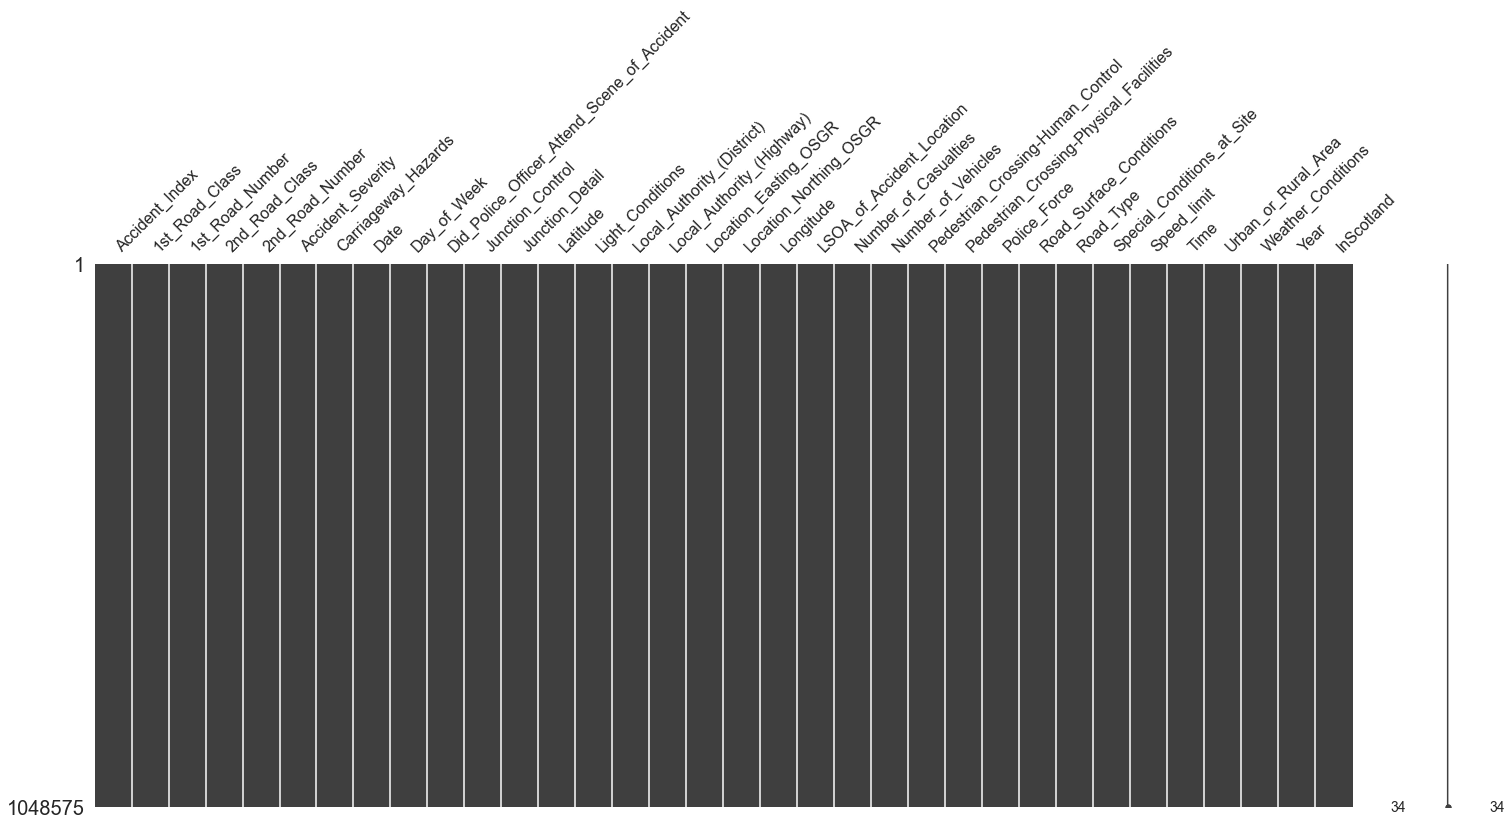

In [15]:
msno.matrix(df)

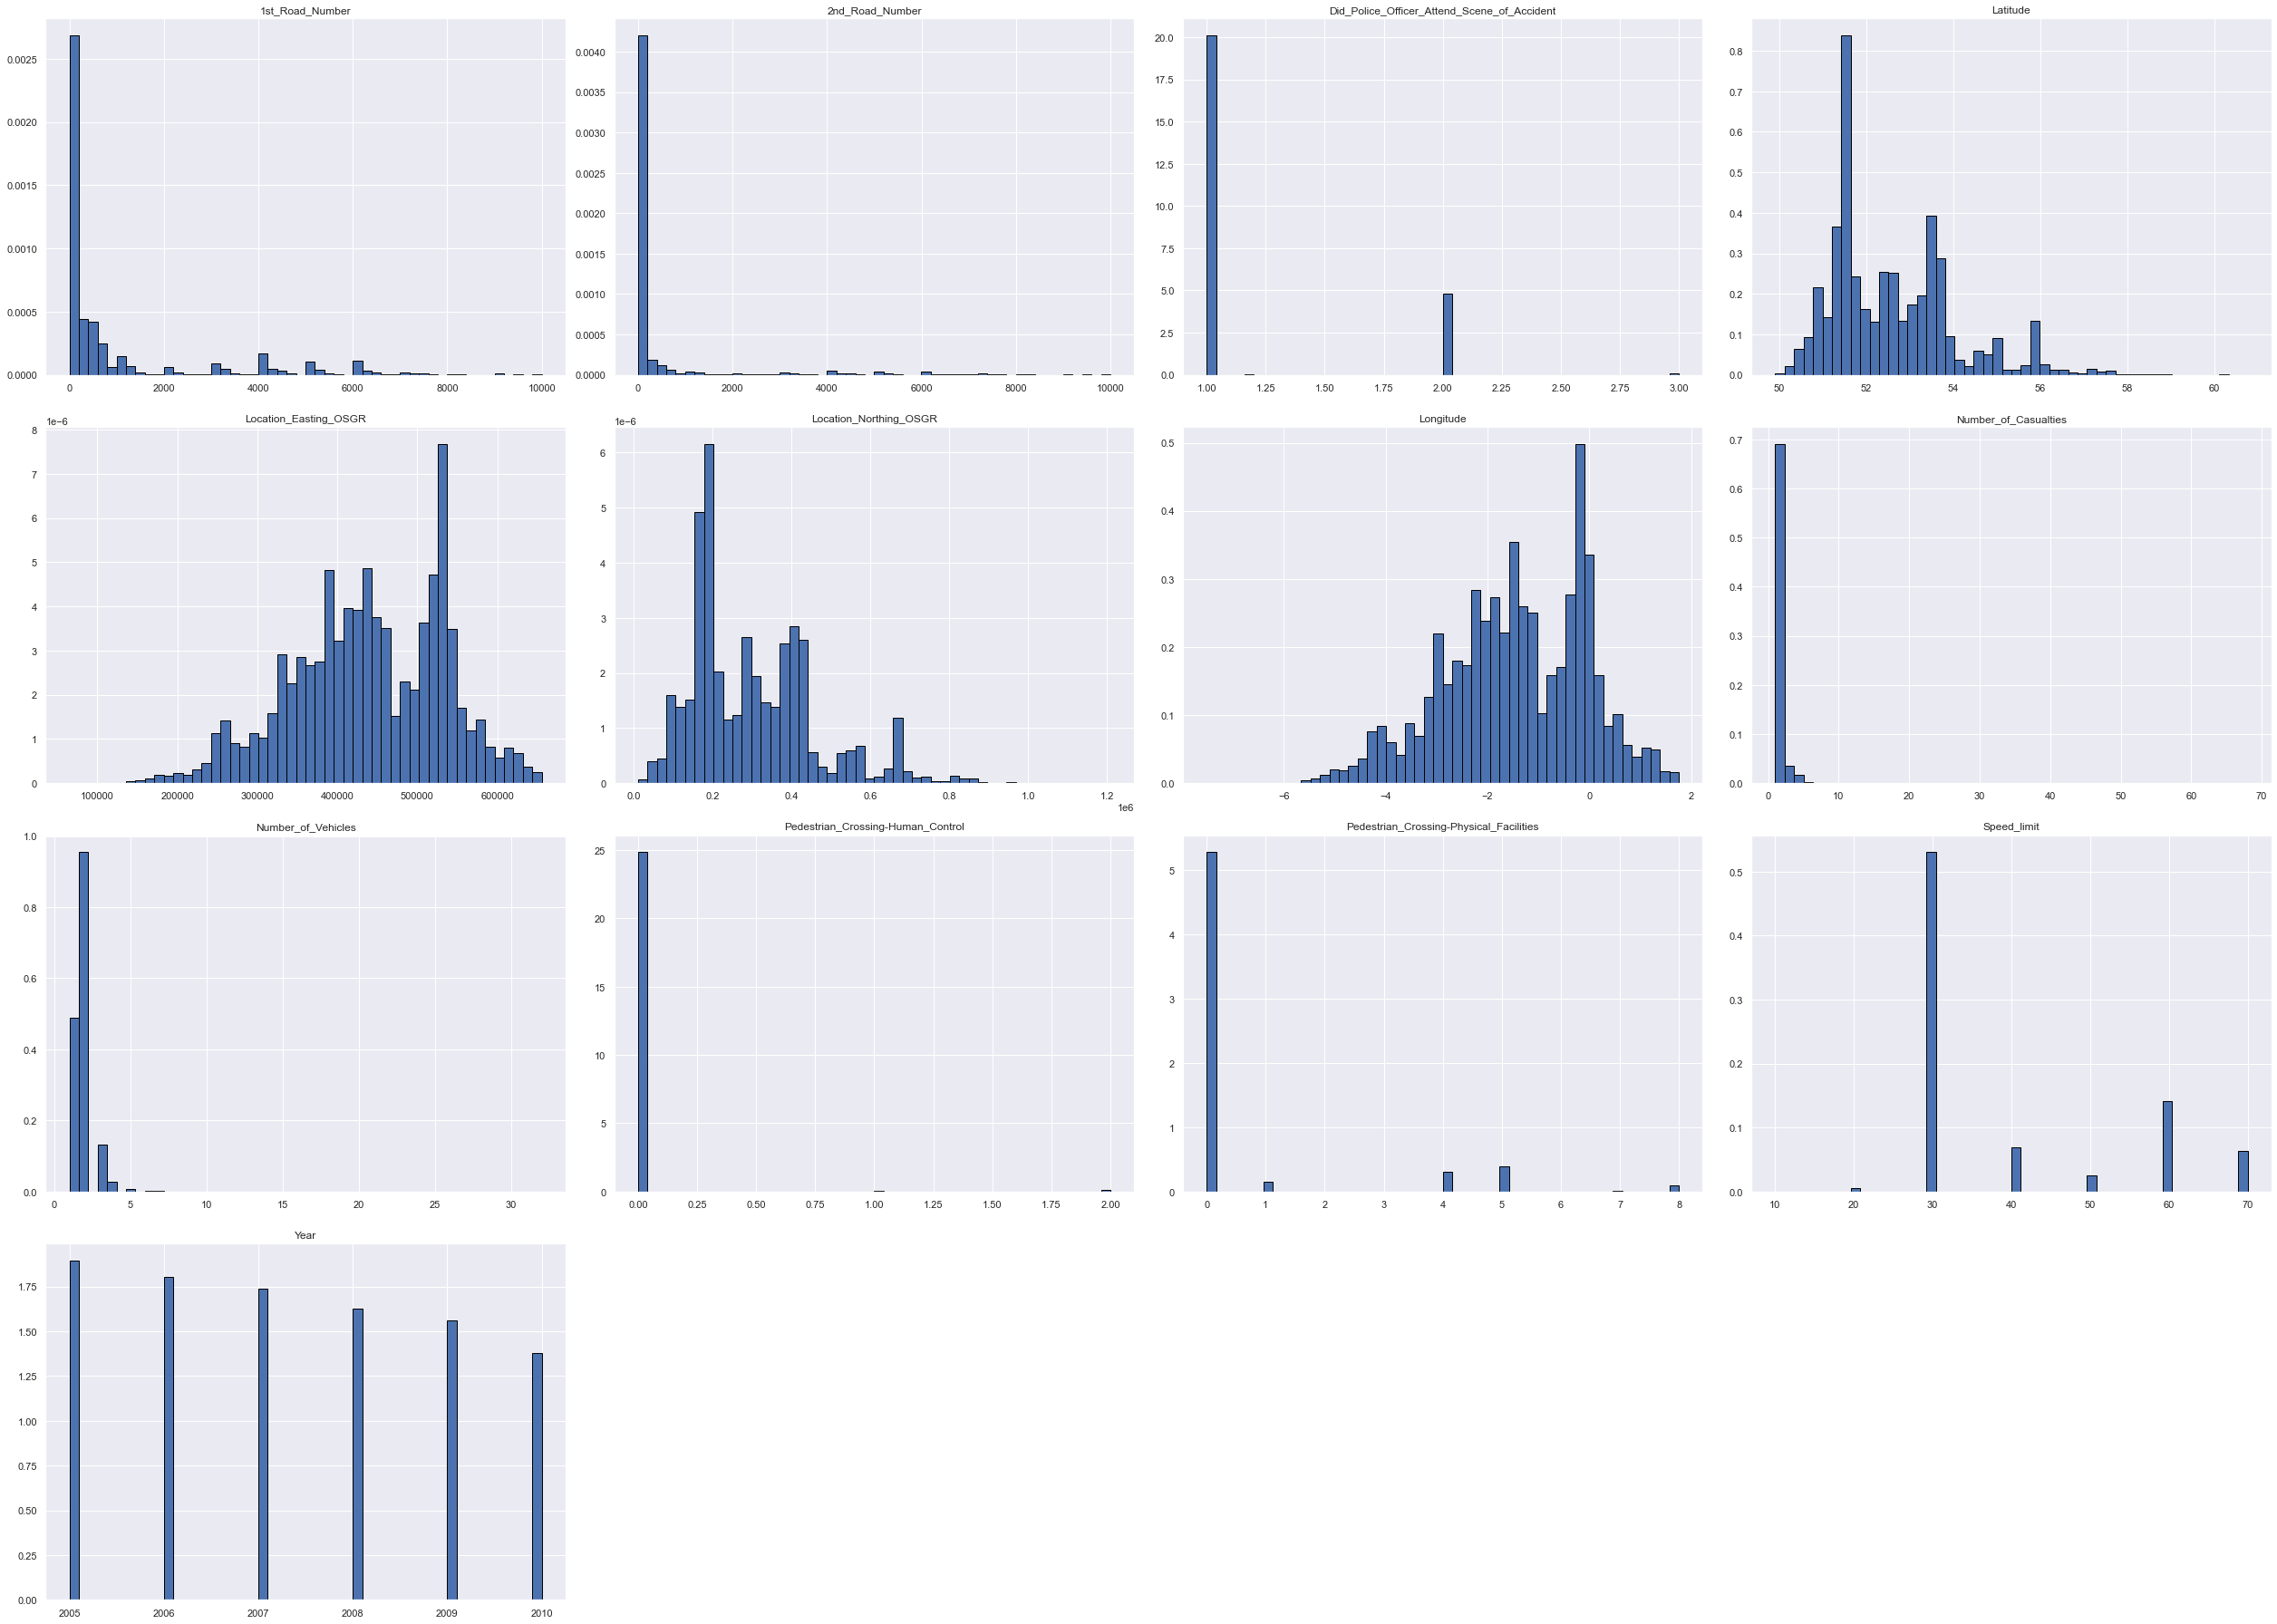

In [16]:
#plt.figure(fogsize=35,10)
df.hist(bins=50 , density = True , figsize=(35,25) , edgecolor='black' )
plt.tight_layout()
plt.show()

In [18]:
df.isnull().sum()

Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties

### Accident_Severity

In [19]:
df['Accident_Severity'].value_counts()*100

Slight     89588300
Serious    13819200
Fatal       1450000
Name: Accident_Severity, dtype: int64



Slight     : 895883
Serious    : 138192
Fatal      : 14500


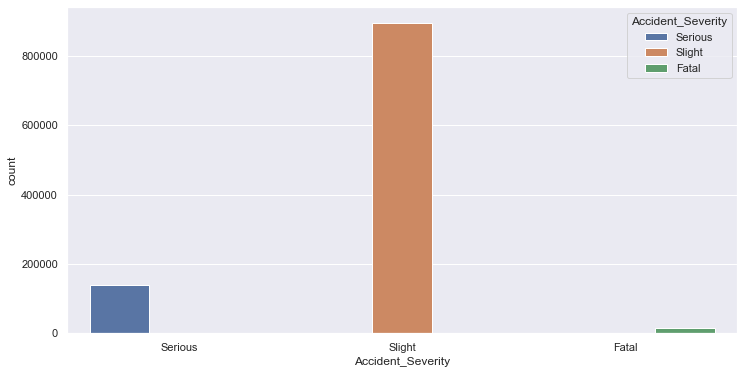

In [20]:
#target_value_count = df['Accident_Severity'].value_counts()
acc_count=df['Accident_Severity'].value_counts()

print('\n')
print('Slight     :',  acc_count[0])
print('Serious    :',  acc_count[1])
print('Fatal      :',  acc_count[2])

plt.figure(figsize=(12,6))
sns.countplot(x='Accident_Severity' , hue='Accident_Severity' , data=df);
sns.set_theme(style="whitegrid")
#target_value.plot(kind='bar', title='Count (target)');

### Separatting Data of Slight , Serious and Fatal from Accident Severity

In [21]:
df_fatal=df[df['Accident_Severity']=='Fatal']
df_Serious=df[df['Accident_Severity']=='Serious']
df_Slight=df[df['Accident_Severity']=='Slight']

In [22]:
print("\nPercentage of Target Values\n")
df['Accident_Severity'].value_counts()/len(df)*100


Percentage of Target Values



Slight     85.438142
Serious    13.179029
Fatal       1.382829
Name: Accident_Severity, dtype: float64

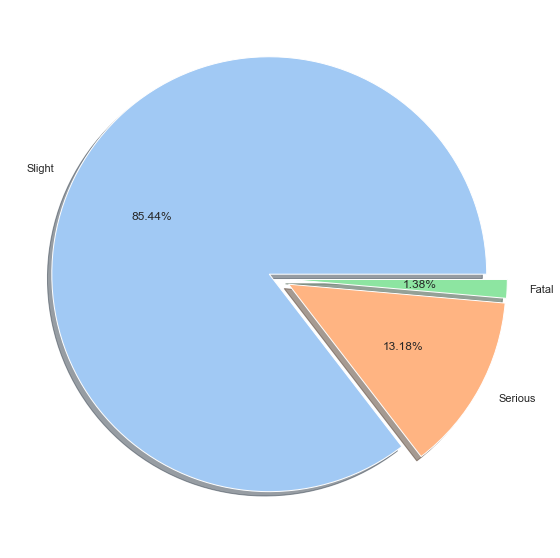

In [23]:
plt.figure(figsize=(20,10))
labels=['Slight' , 'Serious' , 'Fatal']
colors=sns.color_palette('pastel')
plt.pie(df['Accident_Severity'].value_counts() ,labels=labels , autopct='%.2f%%' , shadow= True , colors=colors ,
         explode=[0.05,  0.05 , 0.05]);

### Days of Week Accidents took Place

In [24]:
df['Day_of_Week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday', 'Saturday',
       'Sunday'], dtype=object)


 Days of week accidents took place are :  ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Monday' 'Saturday' 'Sunday']


   Tuesday    : 171910
   Wednesday  : 157992
   Thursday   : 156119
   Friday     : 155788
   Monday     : 148506
   Saturday   : 142227
   Sunday     : 116033


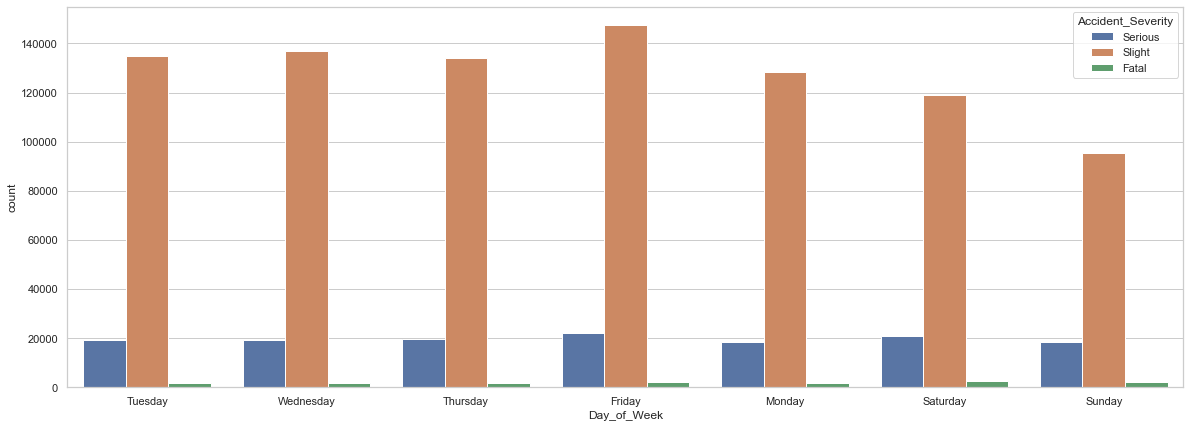

In [25]:
print("\n Days of week accidents took place are : " , df['Day_of_Week'].unique() )

week_value_count=df['Day_of_Week'].value_counts()
print('\n')
print('   Tuesday    :',  week_value_count[0])
print('   Wednesday  :',  week_value_count[1])
print('   Thursday   :',  week_value_count[2])
print('   Friday     :',  week_value_count[3])
print('   Monday     :',  week_value_count[4])
print('   Saturday   :',  week_value_count[5])
print('   Sunday     :',  week_value_count[6])

plt.figure(figsize=(20,7))
sns.set_theme(style="whitegrid")
sns.countplot(x='Day_of_Week'  ,  hue= 'Accident_Severity', data=df);

**Obseravtions**
From the graph it is seen that most of the accidents took place at day # 7  that is Tuesday and also mostly serious accidents took place 
on that day as compared to other days.

### Days of week when only  Serious and Fatal Accidents Took Place 

In [26]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].apply(lambda x:x.hour)

In [27]:
df_fatal=df[df['Accident_Severity']=='Fatal']
df_Serious=df[df['Accident_Severity']=='Serious']
df_Slight=df[df['Accident_Severity']=='Slight']

In [28]:
df['Hour']

0          17
1          17
2           0
3          10
4          21
           ..
1048570     7
1048571     3
1048572     9
1048573    18
1048574    15
Name: Hour, Length: 1048575, dtype: int64

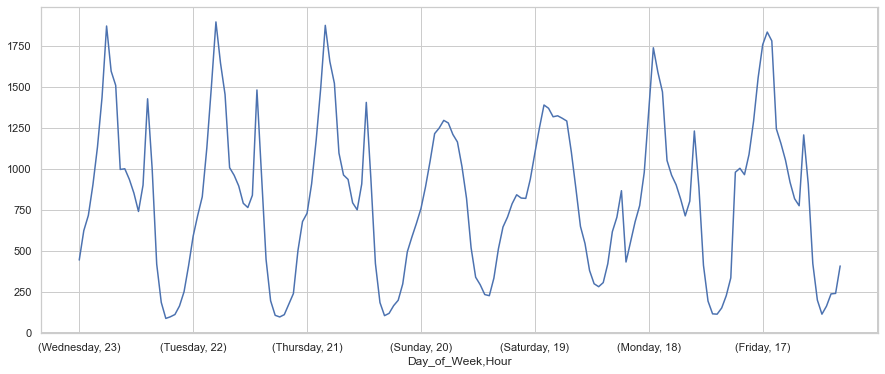

In [30]:
plt.figure(figsize=(15,6))


figure=df_Serious.groupby('Day_of_Week')["Hour"].value_counts().sort_index(ascending = False).plot();

**Observation on Fatal Accidents Data** Most of the Fatal Accidents took place on Saturday ie, encoded as 4  and Sunday encoded as 5

**Observation on Serious Accidents Data**  Most Serious Accidents took place on Tuesday , ie, Day 7 

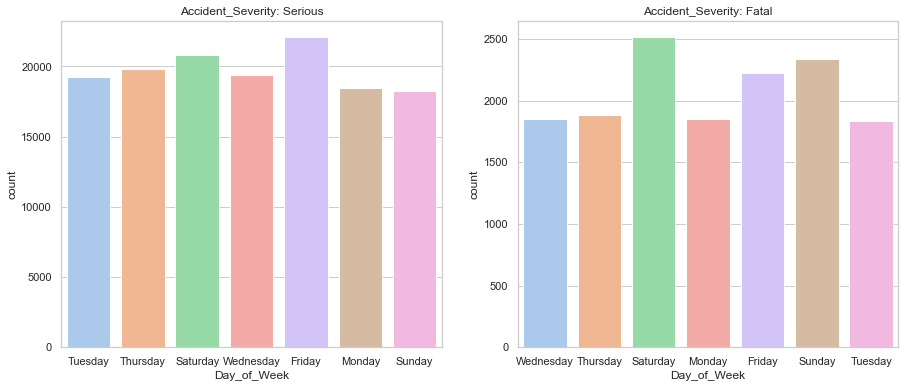

In [31]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
#sns.countplot(x='Day_of_Week' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]);
sns.countplot(x='Day_of_Week'  ,  data=df_Serious , palette="pastel" , ax=ax[0]).set(title=f"Accident_Severity: Serious");
sns.countplot(x='Day_of_Week'  ,  data=df_fatal , palette="pastel" ,ax=ax[1]).set(title=f"Accident_Severity: Fatal");

### Accident Distribution According to Year

Accidents in Year 2005 :  198735
Accidents in Year 2006 :  189161
Accidents in Year 2007 :  182115
Accidents in Year 2008 :  170591
Accidents in Year 2009 :  163554
Accidents in Year 2010 :  144419


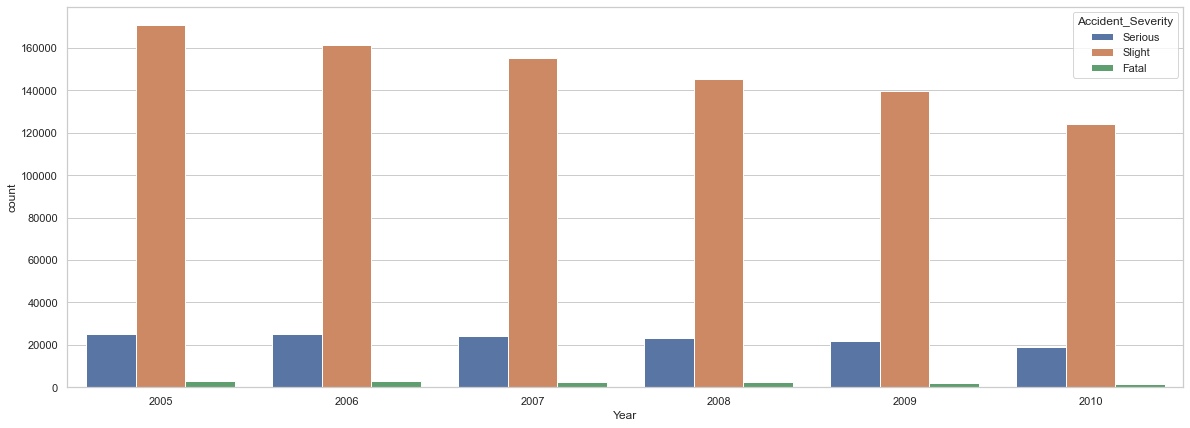

In [32]:
year_count=df['Year'].value_counts()

print( "Accidents in Year 2005 : "  ,  year_count[2005] )
print( "Accidents in Year 2006 : "  ,  year_count[2006] )
print( "Accidents in Year 2007 : "  ,  year_count[2007] )
print( "Accidents in Year 2008 : "  ,  year_count[2008] )
print( "Accidents in Year 2009 : "  ,  year_count[2009] )
print( "Accidents in Year 2010 : "  ,  year_count[2010] )

plt.figure(figsize=(20,7))
sns.countplot(x='Year' , hue='Accident_Severity' ,  data=df);


###  Road Class and Accident Severity

**Ist_Road_Class**

In [33]:
df['1st_Road_Class'].dropna().value_counts()

A           776443
B           133179
C            93983
Motorway     42297
A(M)          2673
Name: 1st_Road_Class, dtype: int64

Ist Road Class A : 776443
Ist Road Class B : 133179
Ist Road Class C : 93983
Ist Road Class Motorway : 42297
Ist Road Class A(M) : 2673


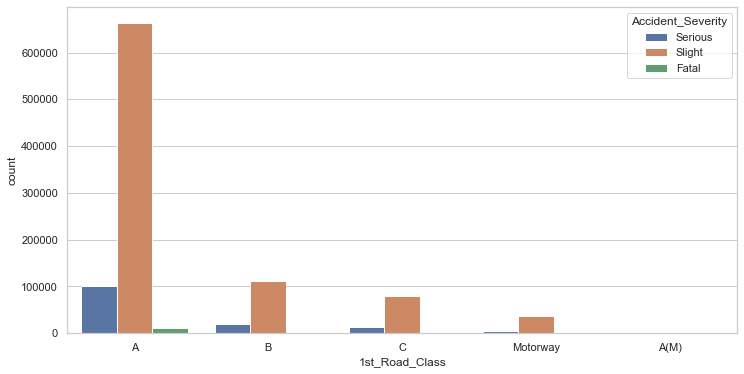

In [34]:
Ist_Road_Class_Counts=df['1st_Road_Class'].value_counts()

print('Ist Road Class A :'       ,  Ist_Road_Class_Counts[0])
print('Ist Road Class B :'       ,  Ist_Road_Class_Counts[1])
print('Ist Road Class C :'       ,  Ist_Road_Class_Counts[2])
print('Ist Road Class Motorway :',  Ist_Road_Class_Counts[3])
print('Ist Road Class A(M) :'    ,  Ist_Road_Class_Counts[4])

plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='1st_Road_Class'  , hue='Accident_Severity' , data=df);

#### Observation
**1st_Road_Class**
B = 1 , C = 2 , A = 4 , Motorway = 5 , A(M) = 6
Here most of the accidents took place on Ist_Road_Class 4.0 That is labelled as A type . More tahn 45000 accidents took place on claas A , then Class type C that is represented by 2 , then Class B and least on Motorway Road class. And the road A(M) shown by number 6 did not have any accident. These are the findings according to the data provided.

**2nd_Road_Class**

In [35]:
df['2nd_Road_Class'].value_counts()

A           953036
C            47542
B            40221
Motorway      6980
A(M)           796
Name: 2nd_Road_Class, dtype: int64


2nd Road Class A      : 953036
2nd Road Class C        : 47542
2nd Road Class B        : 40221
2nd Road Class Motorway : 6980
2nd Road Class A(M)     : 796


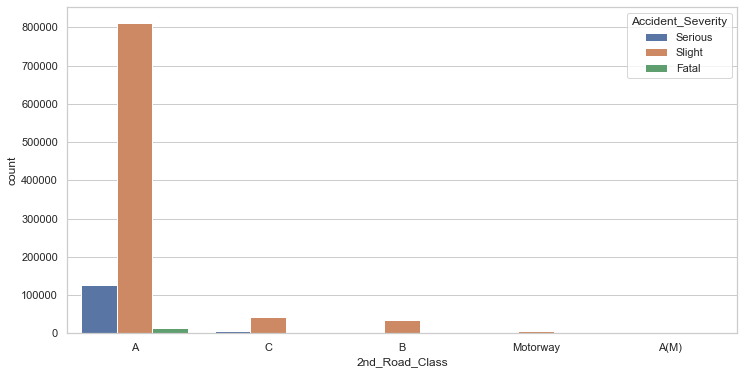

In [36]:
second_Road_Class_Counts=df['2nd_Road_Class'].value_counts()

print('\n2nd Road Class A      :',  second_Road_Class_Counts[0])
print('2nd Road Class C        :',  second_Road_Class_Counts[1])
print('2nd Road Class B        :',  second_Road_Class_Counts[2])
print('2nd Road Class Motorway :',  second_Road_Class_Counts[3])
print('2nd Road Class A(M)     :',  second_Road_Class_Counts[4])


plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='2nd_Road_Class'  , hue='Accident_Severity' , data=df);

In [37]:
# Inscotland deleted accidently

df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

1.000000    843106
2.000000    202134
3.000000      3066
1.198669       269
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64

### Accidents Distributions with respect to " Did_Police_Officer_Attend_Scene_of_Accident"


Did_Police_Officer_Attend_Scene_of_Accident Class 1 :   843106
Did_Police_Officer_Attend_Scene_of_Accident Class 2 :   202134
Did_Police_Officer_Attend_Scene_of_Accident Class 3 :   3066
Did_Police_Officer_Attend_Scene_of_Accident Class 3 :   843106


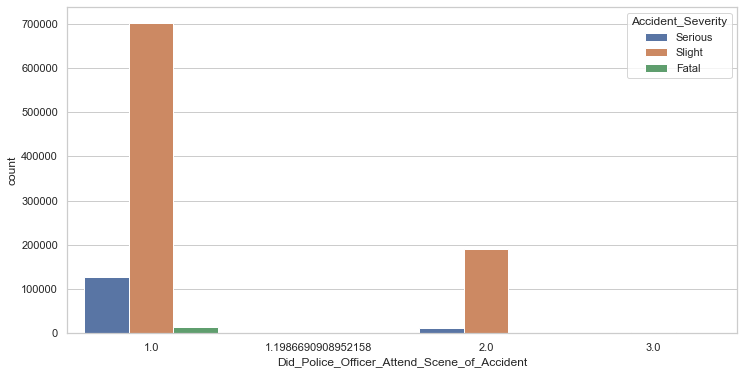

In [38]:

attended_accident = df['Did_Police_Officer_Attend_Scene_of_Accident'].value_counts()

print("\nDid_Police_Officer_Attend_Scene_of_Accident Class 1 :  ", attended_accident[1] )
print("Did_Police_Officer_Attend_Scene_of_Accident Class 2 :  ", attended_accident[2] )
print("Did_Police_Officer_Attend_Scene_of_Accident Class 3 :  ", attended_accident[3] )
print("Did_Police_Officer_Attend_Scene_of_Accident Class 3 :  ", attended_accident[1] )
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
sns.countplot(x='Did_Police_Officer_Attend_Scene_of_Accident', hue="Accident_Severity" , data=df);

In [39]:
df['Special_Conditions_at_Site'].value_counts()

Roadworks                                     1034424
Oil or diesel                                    3998
Mud                                              3458
Road surface defective                           2452
Auto traffic signal - out                        2029
Road sign or marking defective or obscured       1636
Auto signal part defective                        578
Name: Special_Conditions_at_Site, dtype: int64

In [40]:
df.groupby('Special_Conditions_at_Site').mean()

,1st_Road_Number,2nd_Road_Number,Did_Police_Officer_Attend_Scene_of_Accident,Latitude,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Speed_limit,Year,Hour
Special_Conditions_at_Site,,,,,,,,,,,,,,
Auto signal part defective,1154.169550,600.089968,1.112800,52.550106,427205.934256,295904.359862,-1.625492,1.546713,1.915225,0.039792,2.193772,37.387543,2007.318339,13.600346
Auto traffic signal - out,1045.002957,626.060131,1.183932,52.311187,441321.301134,269487.072449,-1.421247,1.466732,1.926072,0.024643,1.997043,36.729916,2007.216856,13.468211
Mud,1139.407461,135.236845,1.096356,52.621400,426124.877876,303794.202713,-1.630110,1.381434,1.535281,0.000578,0.066512,52.750145,2007.224407,13.283979
Oil or diesel,1172.532516,314.338172,1.071036,52.972282,424956.285643,342766.758379,-1.658505,1.481241,1.654577,0.007004,0.397199,45.955478,2007.266633,12.535518
Road sign or marking defective or obscured,992.984719,430.348414,1.076406,52.796546,434682.353301,323187.035452,-1.508402,1.639976,1.901589,0.006724,0.497555,37.695599,2007.240831,14.210880
Road surface defective,1130.117455,190.212075,1.120391,52.588026,428457.308320,300114.473899,-1.600088,1.333197,1.457586,0.002039,0.305873,45.040783,2007.477162,13.480832
Roadworks,1010.556516,387.932828,1.199960,52.571402,438429.398980,298137.123486,-1.452701,1.358696,1.837296,0.009304,0.680277,39.362756,2007.328971,13.611665


In [41]:
df['Carriageway_Hazards'].value_counts()

Other object on road                               1037838
Any animal in carriageway (except ridden horse)       5614
Pedestrian in carriageway - not injured               2257
Previous accident                                     1722
Vehicle load on road                                  1144
Name: Carriageway_Hazards, dtype: int64


claas 2  :  1037838
claas 3  :  5614
claas 4  :  2257
claas 5  :  1722
claas 6  :  1144


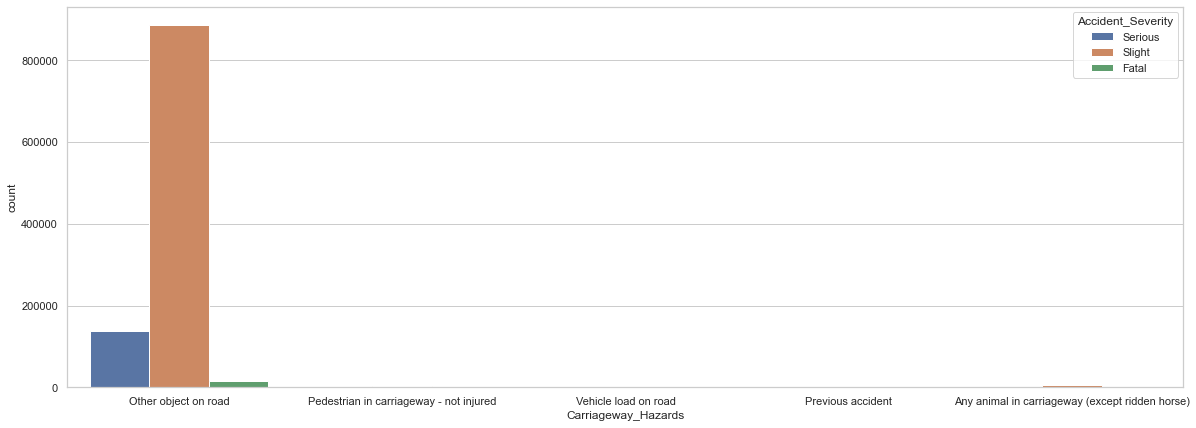

In [42]:
carriage_values = df['Carriageway_Hazards'].dropna().value_counts()

print("\nclaas 2  : " ,carriage_values[0])
print("claas 3  : " ,carriage_values[1])
print("claas 4  : " ,carriage_values[2])
print("claas 5  : " ,carriage_values[3])
print("claas 6  : " ,carriage_values[4])
#print("claas 6  : " ,carriage_values[5])

plt.figure(figsize=(20,7))
sns.countplot(x='Carriageway_Hazards' ,hue='Accident_Severity' , data=df);

### Time Feature

In [43]:

df['Time'] = pd.to_datetime(df['Time'], format='%H')
df['Hour'] = df['Time'].apply(lambda x:x.hour)

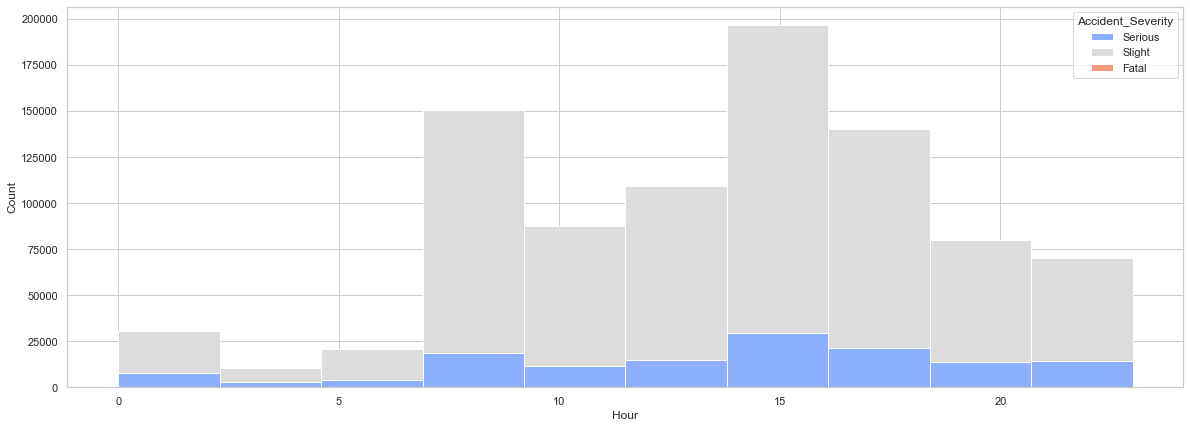

In [44]:
plt.figure(figsize=(20, 7))
sns.histplot(df, x="Hour", hue="Accident_Severity", palette="coolwarm", alpha=1.0, bins=10);

In [45]:
df['Road_Surface_Conditions'].value_counts()

Dry                     713559
Wet or damp             302250
Frost or ice             23857
Snow                      7451
Flood over 3cm. deep      1458
Name: Road_Surface_Conditions, dtype: int64

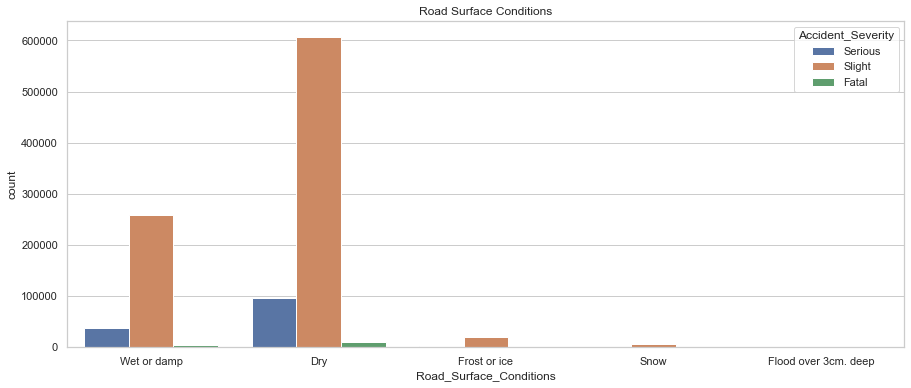

In [46]:



plt.figure(figsize=(15,6))
sns.countplot(x='Road_Surface_Conditions' , hue='Accident_Severity', data=df);
plt.title('Road Surface Conditions');

### Number of Casualities 

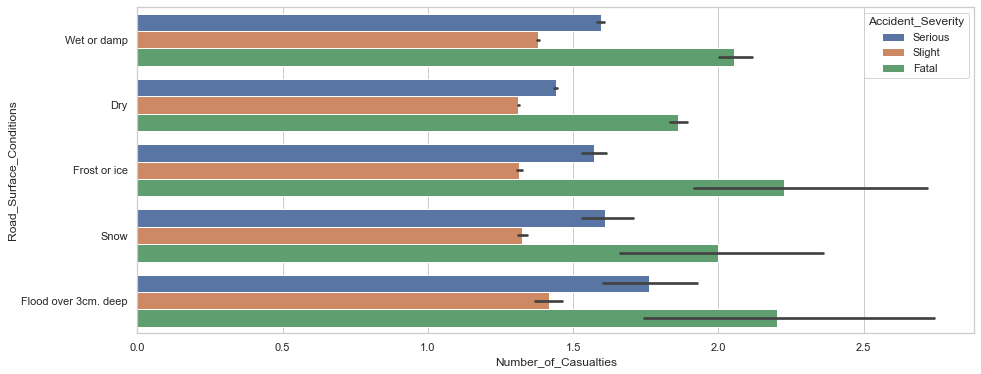

In [101]:
plt.figure(figsize=(15,6))

sns.barplot(x='Number_of_Casualties',y="Road_Surface_Conditions", hue="Accident_Severity" , data=df);

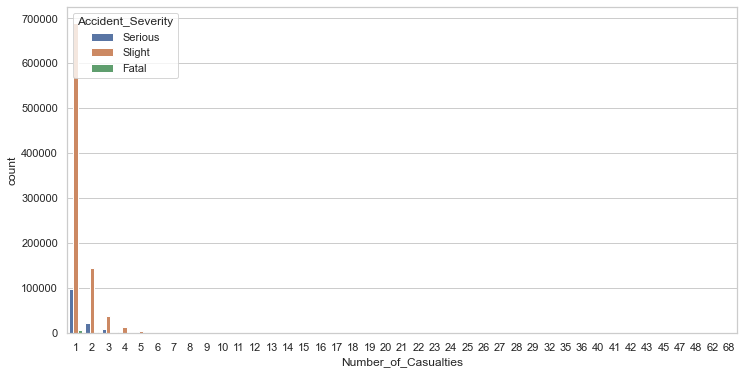

In [118]:
plt.figure(figsize=(12,6))

sns.countplot(x='Number_of_Casualties', hue="Accident_Severity" , data=df);

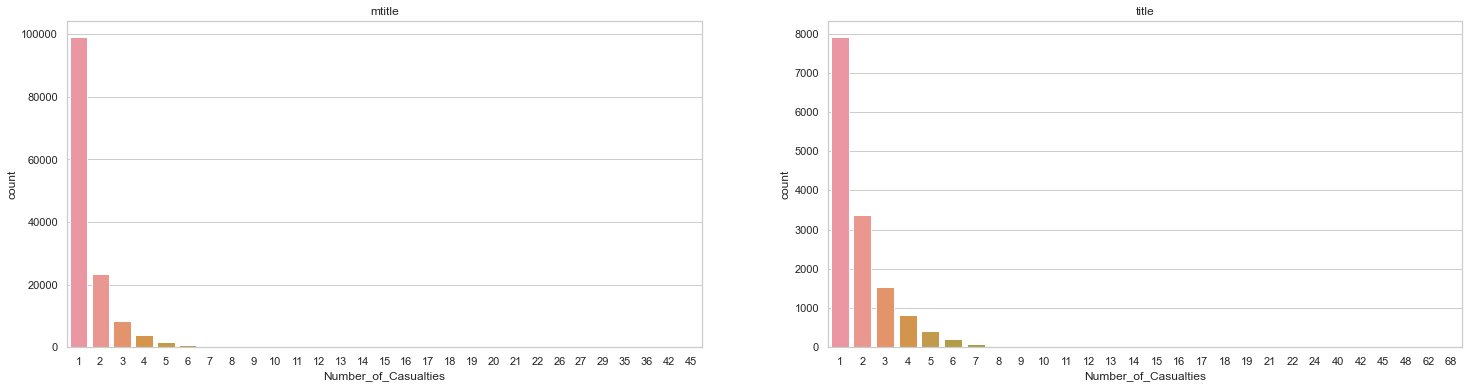

In [116]:
fig , ax=plt.subplots(nrows=1 ,ncols=2 , figsize=(25,6) )
sns.countplot(x='Number_of_Casualties' ,data=df_Serious , ax=ax[0]).set(title=f'mtitle');
sns.countplot(x='Number_of_Casualties'  ,data=df_fatal , ax=ax[1] ).set(title=f'title'); 

**Observation**
From seeing above casualities,its clear that people travelled travelled solo those have more accidents , whereas who travelled 
in groups have less accidents and those who travelled groups of  in 3 and 4 and 5 had less number of accidents. Whereas the 
people who travelled in groups of 6 and 7 , there was no one who alive.

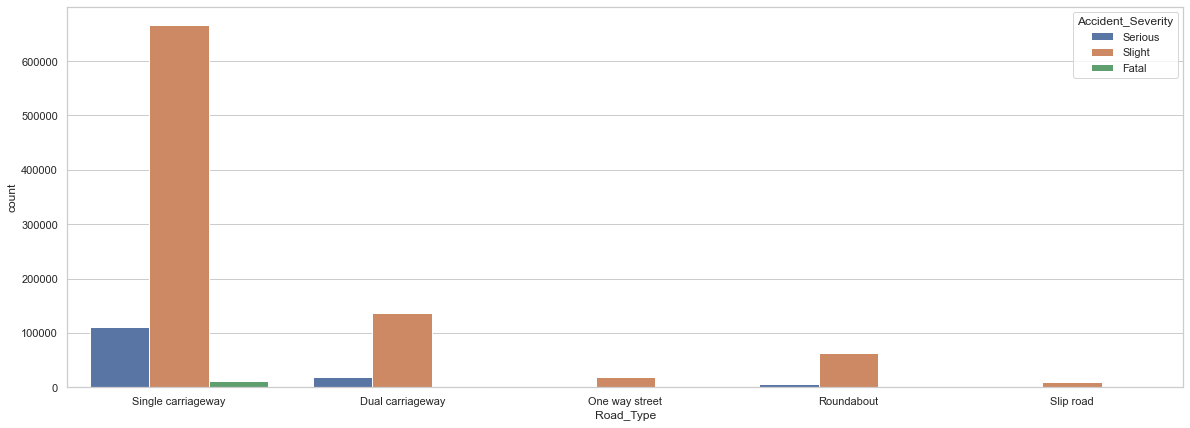

In [51]:
plt.figure(figsize=(20,7))

sns.countplot(x='Road_Type' , hue='Accident_Severity', data=df);

In [52]:
df.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

,Urban_or_Rural_Area,Number_of_Casualties,Percent
0,Rural,1,0.690078
1,Rural,2,0.204733
2,Rural,3,0.064522
3,Rural,4,0.024804
4,Rural,5,0.009515
...,...,...,...
62,Urban,28,0.000001
63,Urban,29,0.000001
64,Urban,32,0.000001
65,Urban,35,0.000001


### Discovering Features of Rural Urban Areas and some Features related to Road

In [91]:
df['Speed_limit'].value_counts()

30    667700
60    177052
40     86150
70     79435
50     30902
20      7306
10        15
15        15
Name: Speed_limit, dtype: int64

### Accident Analysis  In Urban_or_Rural_Area by Speed

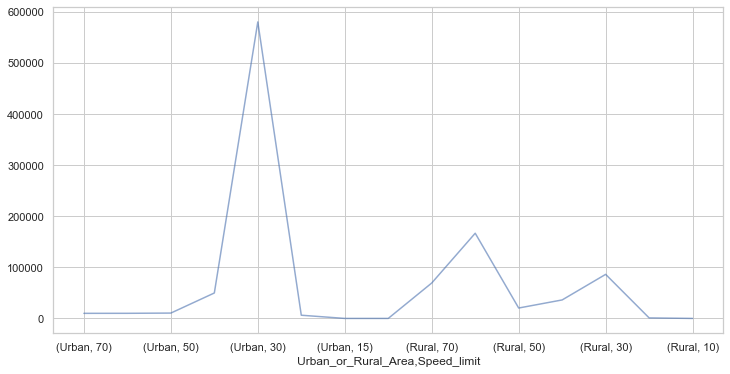

In [99]:
plt.figure(figsize=(12,6))
ax=df.groupby('Urban_or_Rural_Area')['Speed_limit'].value_counts().sort_index(ascending = False).plot(kind='line' , alpha=0.6);


plt.show()

**Observation**  
1. Most of the accidents took place in Urban Area at speed 30
2. In Rural area most of the accident took place at speed 60

### Maximum Casualities on  Road Type Took Place 

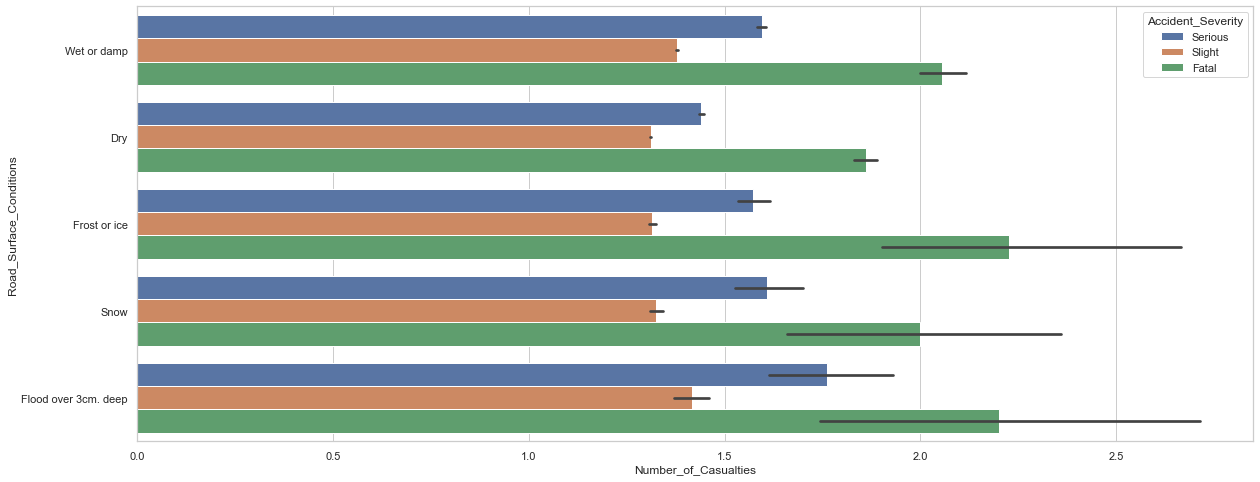

In [57]:
plt.figure(figsize=(20,8))

sns.barplot(x='Number_of_Casualties' , y='Road_Surface_Conditions' ,hue= "Accident_Severity", data=df );

### Maximum Serious and Fatal Casualities took place on Road Type

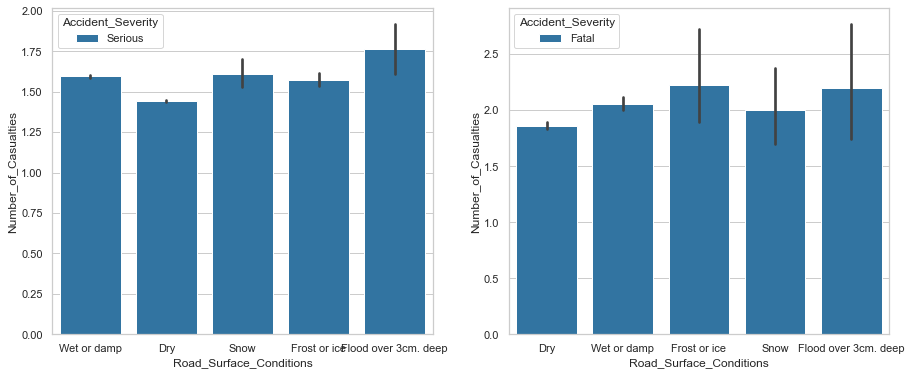

In [58]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(15,6))
#sns.countplot(x='Day_of_Week' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]);
sns.barplot(x='Road_Surface_Conditions' , y="Number_of_Casualties" , hue='Accident_Severity', palette="tab10"  , data=df_Serious , ax=ax[0]);
sns.barplot(x='Road_Surface_Conditions' ,y="Number_of_Casualties",hue='Accident_Severity', palette="tab10" , data=df_fatal , ax=ax[1]);


**Obsevation**
The most fatal accidents took place on Road class 1 and road class 2 

### Weather Condition 

Fine no high winds    : 81.29842882006533
Raining no high winds : 11.967098204706387
Other                 : 2.525904203323558
Raining + high winds  : 1.4016164795079036
Fine + high winds     : 1.2926114011873258
Snowing no high winds : 0.8146293779653339
Fog or mist           : 0.5770688791931907
Snowing + high winds  : 0.12264263405097395


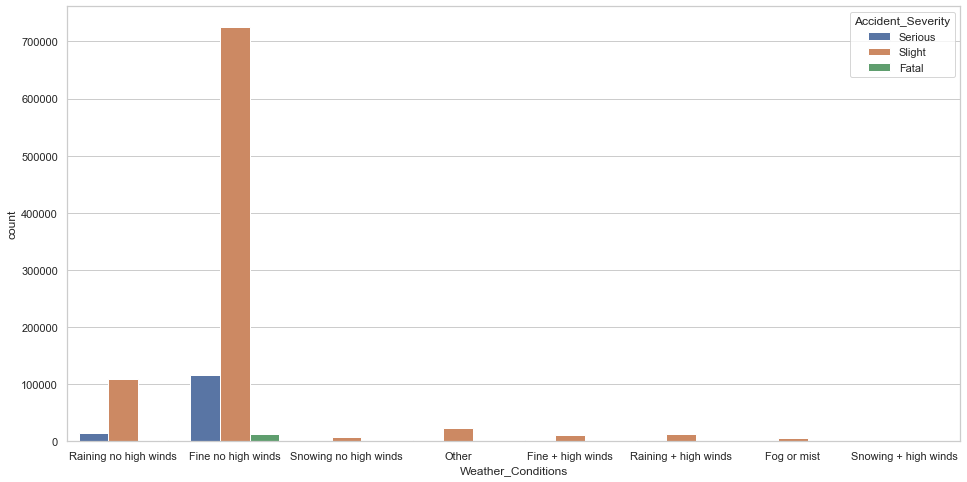

In [66]:
weather_condition_count=df['Weather_Conditions'].value_counts()/len(df)*100 
print("Fine no high winds    :" ,weather_condition_count[0] )
print("Raining no high winds :",weather_condition_count[1] )
print("Other                 :",weather_condition_count[2] )
print("Raining + high winds  :",weather_condition_count[3] )
print("Fine + high winds     :",weather_condition_count[4] )
print("Snowing no high winds :",weather_condition_count[5] )
print("Fog or mist           :",weather_condition_count[6] )
print("Snowing + high winds  :",weather_condition_count[7] )
plt.figure(figsize=(16,8))
sns.countplot(x='Weather_Conditions' , hue='Accident_Severity',  data = df);

The graph shows that mostly 81%  accidents occur when weather is fine indicated by number 1 and 12 % when weather is normal shown by number 2 ie, weather is 
rainy but no high winds . the number 3, 4 , 5 shows cold weather and less number of accidents comparatively while 7 shows fog  and 6, and 9 shows stormy weather and 
not more accidents because in such weather people avoid to go outside and remain in their houses.

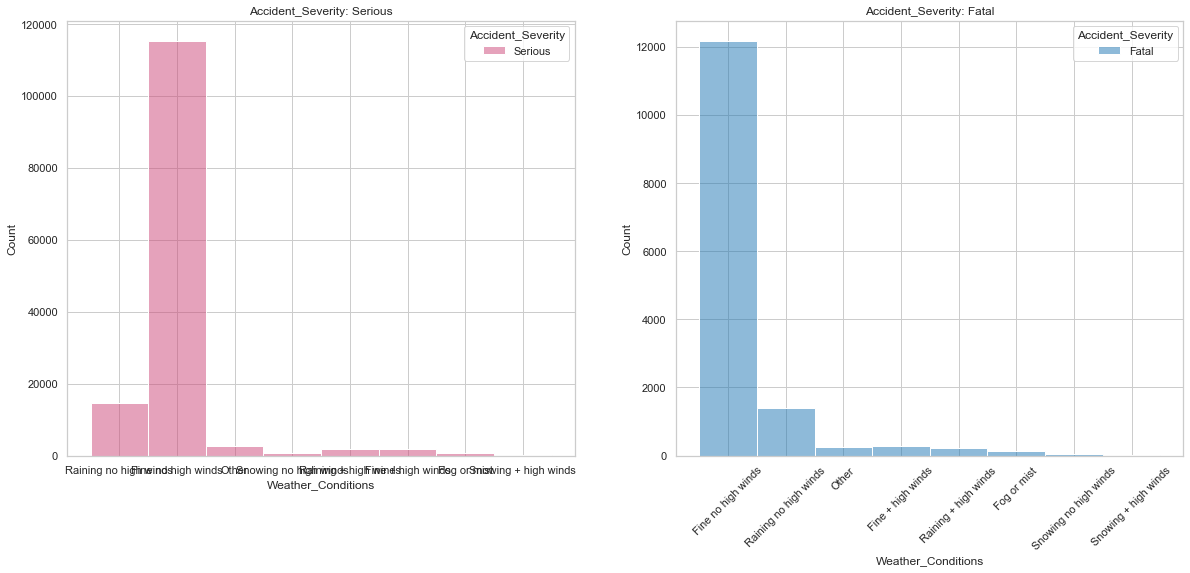

In [139]:
fig, ax= plt.subplots(nrows=1 , ncols=2 , figsize=(20,8))
for axes in ax.flatten():
    plt.xticks(rotation=45)

sns.histplot(x='Weather_Conditions' ,hue='Accident_Severity'  ,palette="plasma" ,  data=df_Serious , ax=ax[0]).set(title=f"Accident_Severity: Serious");
sns.histplot(x='Weather_Conditions' ,hue='Accident_Severity' ,palette="tab10" ,  data=df_fatal , ax=ax[1]).set(title=f"Accident_Severity: Fatal");
plt.show()

In [135]:
df_weather_casual= df.groupby('Weather_Conditions')['Number_of_Casualties'].value_counts(normalize=True).reset_index(name='Percent')

In [63]:
df['Junction_Control'].unique()

array(['Give way or uncontrolled', 'Auto traffic signal', 'Stop sign',
       'Authorised person', 'Not at junction or within 20 metres'],
      dtype=object)

In [64]:
df[['Accident_Index' ,'Junction_Control']].tail(55)

,Accident_Index,Junction_Control
1048520,201091NK05765,Give way or uncontrolled
1048521,201091NK06094,Give way or uncontrolled
1048522,201091NK06242,Give way or uncontrolled
1048523,201091NL00060,Give way or uncontrolled
1048524,201091NL00278,Give way or uncontrolled
1048525,201091NL00686,Give way or uncontrolled
1048526,201091NL00928,Give way or uncontrolled
1048527,201091NL01071,Give way or uncontrolled
1048528,201091NL02061,Give way or uncontrolled
1048529,201091NL03115,Give way or uncontrolled


##### Here Below I am dropping Some Features and viewing other Important Features Relation  

### 1st Road Class

In [67]:
df1=df[df['1st_Road_Class']==1]['1st_Road_Number'] 
df2=df[df['1st_Road_Class']==3]['1st_Road_Number'] 
df4=df[df['1st_Road_Class']==4]['1st_Road_Number']
df5=df[df['1st_Road_Class']==5]['1st_Road_Number']
df6=df[df['1st_Road_Class']==6]['1st_Road_Number']
df7=df[df['1st_Road_Class']==0]['1st_Road_Number']


In [68]:
def draw_histogram(data, ax, title):
    sns.histplot(x=data, bins=50, ax=ax).set(title=f"Road Class - {title}");

### 2nd Road Class

In [70]:
df_a=df[df['2nd_Road_Class']==1]['2nd_Road_Number'] 
df_b=df[df['2nd_Road_Class']==3]['2nd_Road_Number']
df_c=df[df['2nd_Road_Class']==4]['2nd_Road_Number']
df_m=df[df['2nd_Road_Class']==5]['2nd_Road_Number']
df_am=df[df['2nd_Road_Class']==6]['2nd_Road_Number'] 
df_b

Series([], Name: 2nd_Road_Number, dtype: float64)

### Light_Conditions

In [72]:
df['Light_Conditions'].nunique() 

4

In [73]:
df['Light_Conditions'].unique() 

array(['Daylight', 'Darkness - lights lit', 'Darkness - lighting unknown',
       'Darkness - lights unlit'], dtype=object)

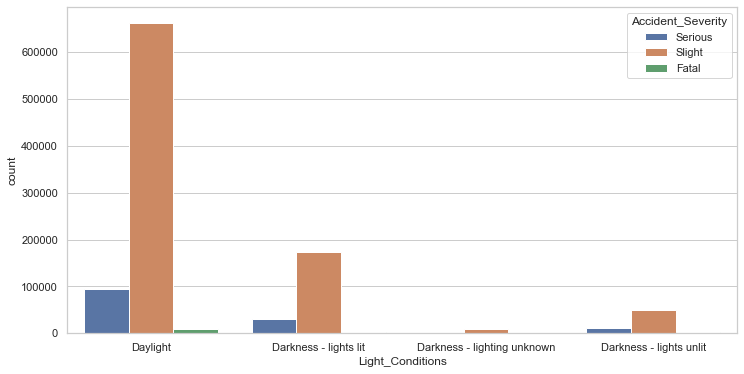

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df);

**Observation**
The most of the accidents took place at condion 5 ie daylight and also the fatal accidents also took place in daylight.and then 
in darkness when lights were lit ie, at 1 .

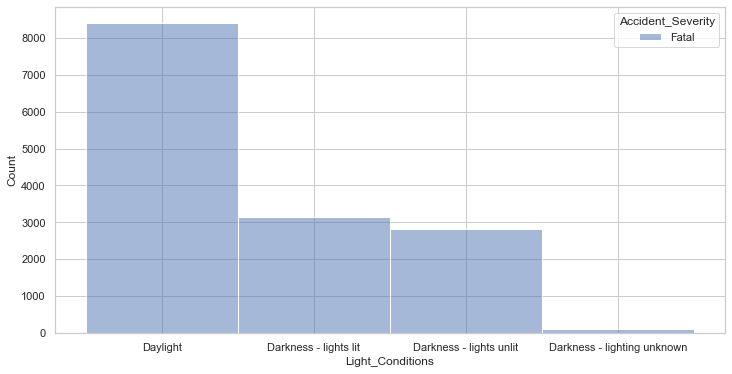

In [140]:
plt.figure(figsize=(12,6))
sns.histplot(x='Light_Conditions' , hue=  'Accident_Severity' , data=df_fatal);

## Feature Engineering

**Observation**  If we see on fatal data , that also shows more deaths in daylight ie, number  5 and in darkness when lights were 
lit. ie, at number 1. 

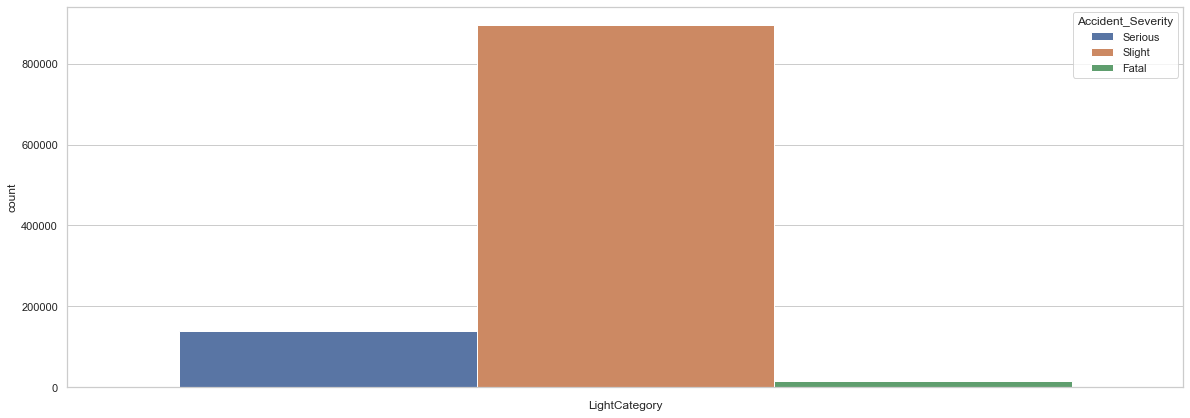

In [77]:
plt.figure(figsize=(20,7))
sns.countplot(x='LightCategory' , hue="Accident_Severity" , data=df);
 #sns.boxplot(x="Accident_Severity" , y="LightCategory" , data=df); 

In [78]:
df['Casuality_GrpSize'] = ''
df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'].replace('', 'Solo')
df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'].replace('', 'couple')
df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=5), 'Casuality_GrpSize'].replace('', 'small_group')
df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'].replace('', 'Large FatalGroup')
df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'].replace('', 'Larger Group')
df.head(45)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour,LightCategory,Casuality_GrpSize
0,200501BS00001,A,3218.0,A,0.0,Serious,Other object on road,04/01/2005,Tuesday,1.0,...,Roadworks,30,1900-01-01 17:42:00,Urban,Raining no high winds,2005,No,17,,Solo
1,200501BS00002,B,450.0,C,0.0,Slight,Other object on road,05/01/2005,Wednesday,1.0,...,Roadworks,30,1900-01-01 17:36:00,Urban,Fine no high winds,2005,No,17,,Solo
2,200501BS00003,C,0.0,A,0.0,Slight,Other object on road,06/01/2005,Thursday,1.0,...,Roadworks,30,1900-01-01 00:15:00,Urban,Fine no high winds,2005,No,0,,Solo
3,200501BS00004,A,3220.0,A,0.0,Slight,Other object on road,07/01/2005,Friday,1.0,...,Roadworks,30,1900-01-01 10:35:00,Urban,Fine no high winds,2005,No,10,,Solo
4,200501BS00005,A,0.0,A,0.0,Slight,Other object on road,10/01/2005,Monday,1.0,...,Roadworks,30,1900-01-01 21:13:00,Urban,Fine no high winds,2005,No,21,,Solo
5,200501BS00006,A,0.0,A,0.0,Slight,Other object on road,11/01/2005,Tuesday,1.0,...,Oil or diesel,30,1900-01-01 12:40:00,Urban,Raining no high winds,2005,No,12,,Solo
6,200501BS00007,C,0.0,A,0.0,Slight,Other object on road,13/01/2005,Thursday,1.0,...,Roadworks,30,1900-01-01 20:40:00,Urban,Fine no high winds,2005,No,20,,Solo
7,200501BS00009,A,315.0,A,0.0,Slight,Other object on road,14/01/2005,Friday,1.0,...,Roadworks,30,1900-01-01 17:35:00,Urban,Fine no high winds,2005,No,17,,couple
8,200501BS00010,A,3212.0,B,304.0,Slight,Other object on road,15/01/2005,Saturday,1.0,...,Roadworks,30,1900-01-01 22:43:00,Urban,Fine no high winds,2005,No,22,,couple
9,200501BS00011,B,450.0,C,0.0,Slight,Other object on road,15/01/2005,Saturday,1.0,...,Roadworks,30,1900-01-01 16:00:00,Urban,Fine no high winds,2005,No,16,,small_group


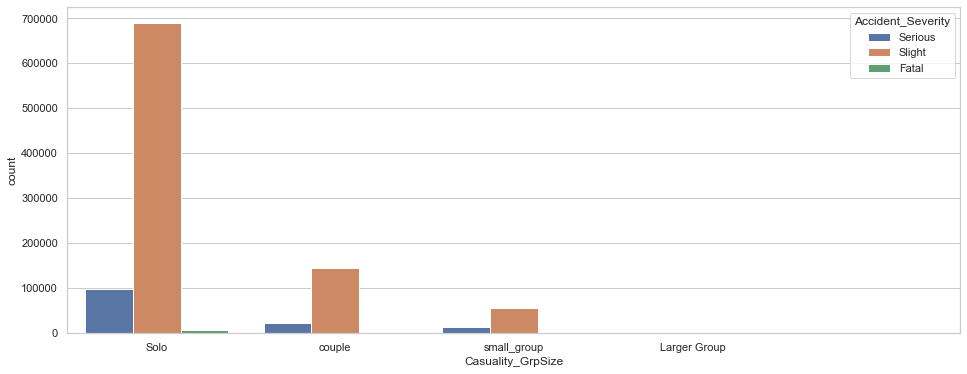

In [79]:
plt.figure(figsize=(16,6))
sns.set_theme(style="whitegrid")
sns.countplot(x="Casuality_GrpSize" , hue= 'Accident_Severity' , data=df);

In [80]:
df['Weather_Conditions'].unique()

array(['Raining no high winds', 'Fine no high winds',
       'Snowing no high winds', 'Other', 'Fine + high winds',
       'Raining + high winds', 'Fog or mist', 'Snowing + high winds'],
      dtype=object)

### Creating a Separate DataFrame For Numerical and Categorical Features

In [81]:
Categorical_Features = df.select_dtypes('object').columns
Categorical_Features

Index(['Accident_Index', '1st_Road_Class', '2nd_Road_Class',
       'Accident_Severity', 'Carriageway_Hazards', 'Date', 'Day_of_Week',
       'Junction_Control', 'Junction_Detail', 'Light_Conditions',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       'LSOA_of_Accident_Location', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Special_Conditions_at_Site', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'InScotland', 'LightCategory',
       'Casuality_GrpSize'],
      dtype='object')

In [82]:
Numerical_Features = df.select_dtypes('number').columns
Numerical_Features

Index(['1st_Road_Number', '2nd_Road_Number',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Latitude',
       'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Speed_limit', 'Year',
       'Hour'],
      dtype='object')

In [ ]:
df_Category=df[Categorical_Features].copy()
df_Category

In [84]:
df_num=df[Numerical_Features_new].copy()
df_num

NameError: name 'Numerical_Features_new' is not defined

In [85]:
df['Casuality_GrpSize'] = ''
df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==1, 'Casuality_GrpSize'].replace('', 'Solo')
df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']==2, 'Casuality_GrpSize'].replace('', 'couple')
df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']>=3) & (df['Number_of_Casualties']<=7), 'Casuality_GrpSize'].replace('', 'small_group')
#df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'] = df.loc[(df['Number_of_Casualties']==6) & (df['Number_of_Casualties']==7), 'Casuality_GrpSize'].replace('', 'Large FatalGroup')
df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'] = df.loc[df['Number_of_Casualties']>=8, 'Casuality_GrpSize'].replace('', 'Larger Group')
df.head(45)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland,Hour,LightCategory,Casuality_GrpSize
0,200501BS00001,A,3218.0,A,0.0,Serious,Other object on road,04/01/2005,Tuesday,1.0,...,Roadworks,30,1900-01-01 17:42:00,Urban,Raining no high winds,2005,No,17,,Solo
1,200501BS00002,B,450.0,C,0.0,Slight,Other object on road,05/01/2005,Wednesday,1.0,...,Roadworks,30,1900-01-01 17:36:00,Urban,Fine no high winds,2005,No,17,,Solo
2,200501BS00003,C,0.0,A,0.0,Slight,Other object on road,06/01/2005,Thursday,1.0,...,Roadworks,30,1900-01-01 00:15:00,Urban,Fine no high winds,2005,No,0,,Solo
3,200501BS00004,A,3220.0,A,0.0,Slight,Other object on road,07/01/2005,Friday,1.0,...,Roadworks,30,1900-01-01 10:35:00,Urban,Fine no high winds,2005,No,10,,Solo
4,200501BS00005,A,0.0,A,0.0,Slight,Other object on road,10/01/2005,Monday,1.0,...,Roadworks,30,1900-01-01 21:13:00,Urban,Fine no high winds,2005,No,21,,Solo
5,200501BS00006,A,0.0,A,0.0,Slight,Other object on road,11/01/2005,Tuesday,1.0,...,Oil or diesel,30,1900-01-01 12:40:00,Urban,Raining no high winds,2005,No,12,,Solo
6,200501BS00007,C,0.0,A,0.0,Slight,Other object on road,13/01/2005,Thursday,1.0,...,Roadworks,30,1900-01-01 20:40:00,Urban,Fine no high winds,2005,No,20,,Solo
7,200501BS00009,A,315.0,A,0.0,Slight,Other object on road,14/01/2005,Friday,1.0,...,Roadworks,30,1900-01-01 17:35:00,Urban,Fine no high winds,2005,No,17,,couple
8,200501BS00010,A,3212.0,B,304.0,Slight,Other object on road,15/01/2005,Saturday,1.0,...,Roadworks,30,1900-01-01 22:43:00,Urban,Fine no high winds,2005,No,22,,couple
9,200501BS00011,B,450.0,C,0.0,Slight,Other object on road,15/01/2005,Saturday,1.0,...,Roadworks,30,1900-01-01 16:00:00,Urban,Fine no high winds,2005,No,16,,small_group


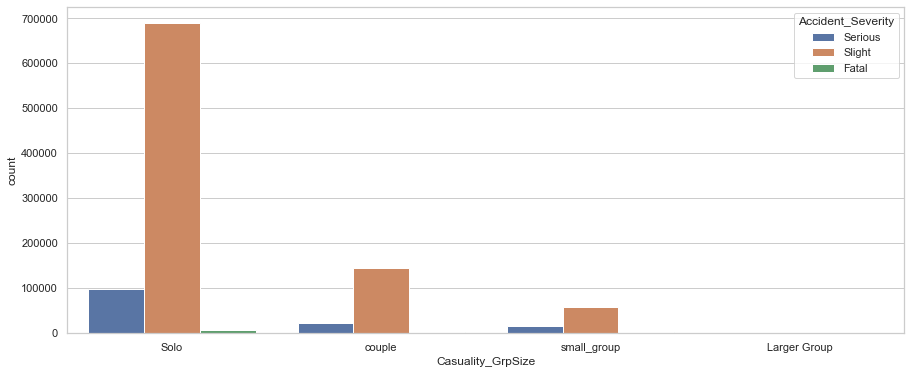

In [86]:
plt.figure(figsize=(15,6))
sns.countplot(x="Casuality_GrpSize" ,hue="Accident_Severity", data=df);